In [1]:
import os
os.chdir('E:/final_dataset/')
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 4, 4
sc.settings.set_figure_params(dpi=100, facecolor='white')
sc.logging.print_header()
sns.set_style("white")
sns.despine()
import plotly.express as px

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.5 scipy==1.9.1 pandas==1.4.4 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.10.3 pynndescent==0.5.8


<Figure size 400x400 with 0 Axes>

In [2]:
cn = sc.read_h5ad('10x_cn_mtx/cn.all.h5ad')

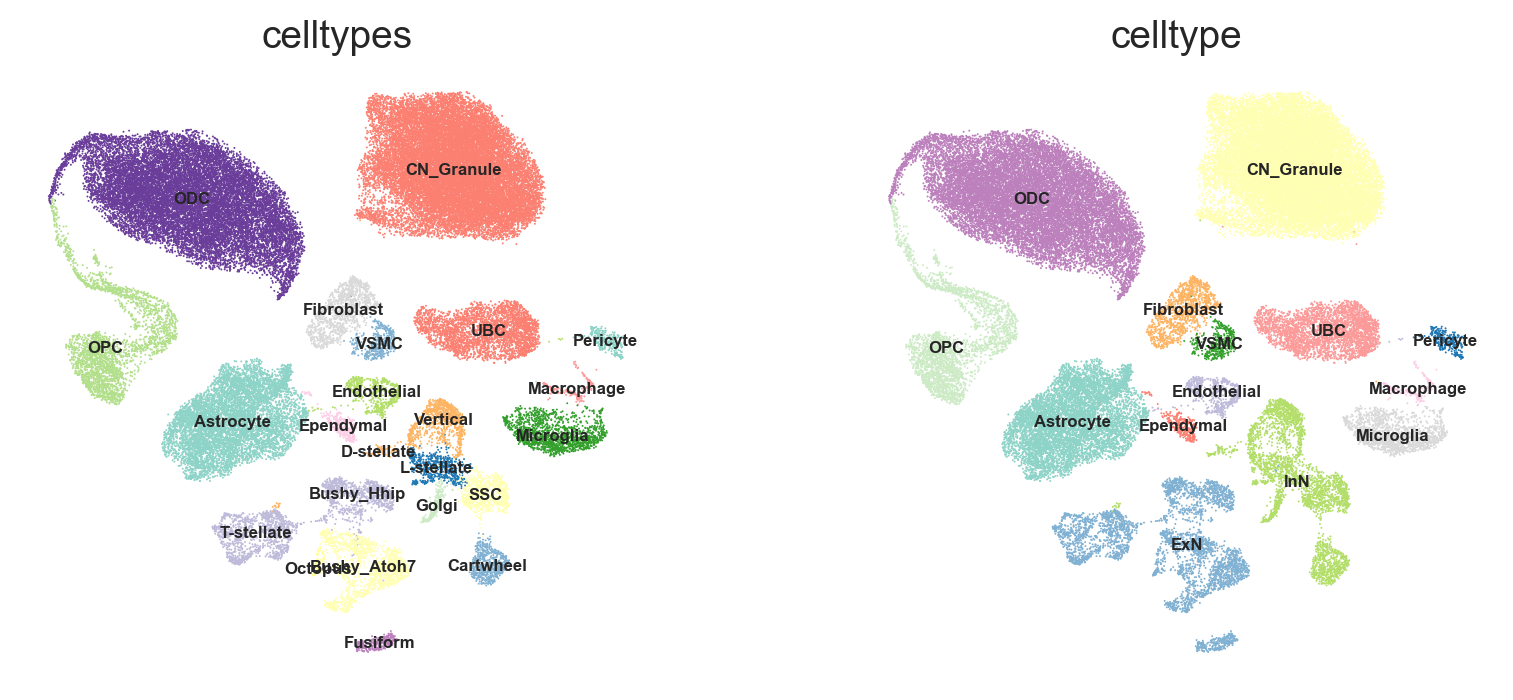

In [3]:
sc.pl.umap(cn, color = ['celltypes', 'celltype'],
          frameon =False,legend_loc ='on data', legend_fontsize = 6)

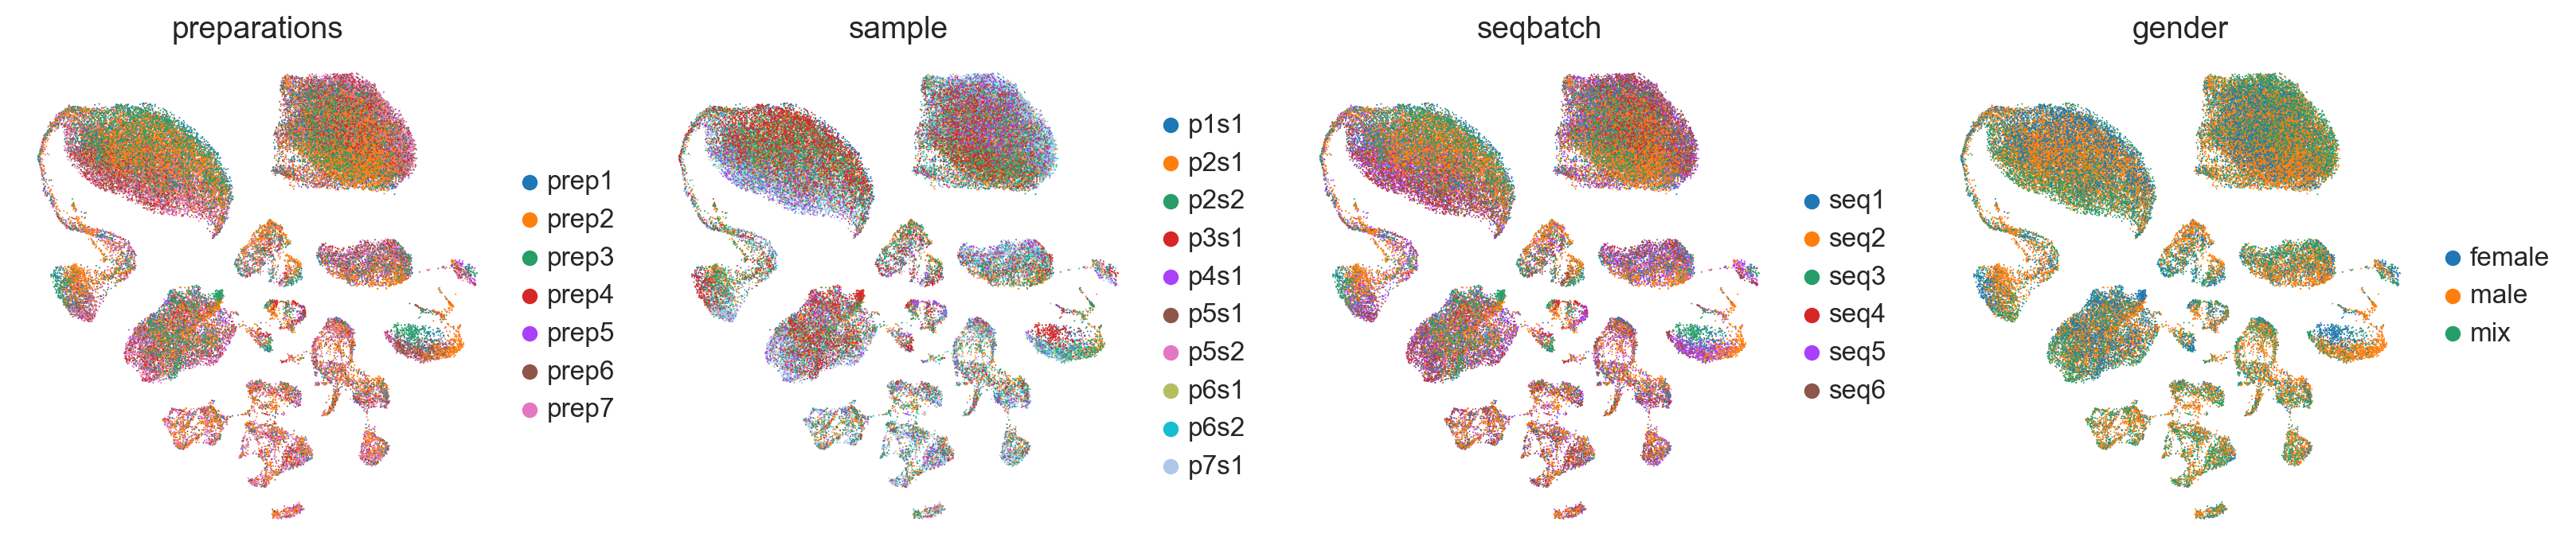

In [4]:
rcParams['figure.figsize'] = 4, 4
g = sc.pl.umap(cn,color=['preparations','sample','seqbatch','gender'],
               s=2,legend_fontsize=12,frameon = False,

              )

C:\Users\Junzhan\AppData\Local\Temp\ipykernel_20668\3840839366.py:4: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, 20000)


Text(0.5, 0, 'Samples')

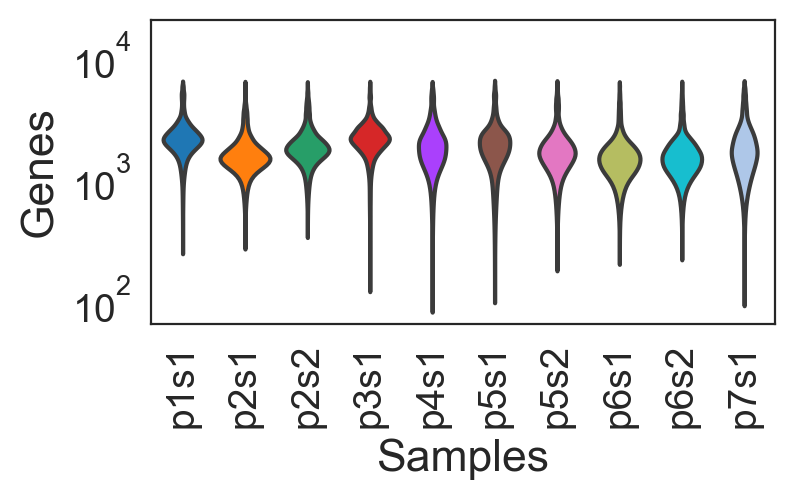

In [5]:
rcParams['figure.figsize'] = 4, 2
ax = sns.violinplot(x=cn.obs["sample"], y=cn.obs['n_genes_by_counts'],saturation=1, inner=None)
ax.set_yscale("log")
ax.set_ylim(0, 20000) 
plt.xticks(rotation=90)
plt.ylabel("Genes", size=16)
plt.xlabel("Samples", size=16)
#plt.savefig('/other_figs/Genes_by_samples.png',dpi = 300)

Text(0.5, 0, 'Samples')

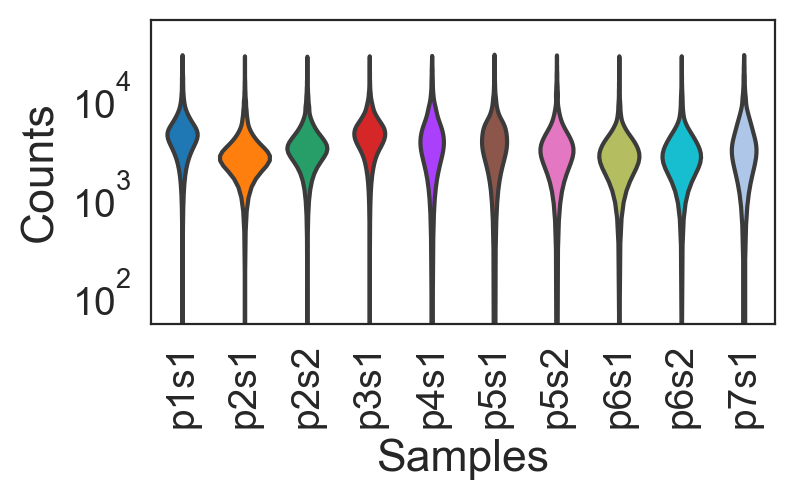

In [6]:
ax = sns.violinplot(x=cn.obs["sample"], y=cn.obs['total_counts'],saturation=1, inner=None)
ax.set_yscale("log")
ax.set_ylim(50, 60000) 
plt.xticks(rotation=90)
plt.ylabel("Counts", size=16)
plt.xlabel("Samples", size=16)
#plt.savefig('/other_figs/Counts_by_samples.png',dpi = 300)

In [7]:
order= ['CN_Granule',
 'ODC',
 'Astrocyte',
 'UBC',
 'OPC',
 'Bushy_Atoh7',
 'Microglia',
 'T-stellate',
 'Fibroblast',
 'Bushy_Hhip',
 'Vertical',
 'SSC',
 'Cartwheel',
 'L-stellate',
 'Endothelial',
 'VSMC',
 'Fusiform',
 'Ependymal',
 'Pericyte',
 'Golgi',
 'Macrophage',
 'Octopus',
 'D-stellate']

In [8]:
cellnbycluster = pd.DataFrame(cn.obs.groupby(["celltypes"]).apply(len))
cellnbycluster = cellnbycluster.reset_index()
cellnbycluster = cellnbycluster.rename(columns={0: 'counts'})
cellnbycluster['percent'] = (cellnbycluster['counts'] / cellnbycluster['counts'].sum()) * 100
cellnbycluster = cellnbycluster.sort_values(by=['counts'], ascending=False)
fig = px.bar(cellnbycluster, x="celltypes", y='percent',title="")
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'},height=400,width = 600)

fig.update_xaxes(showline=True, linewidth=1.0, linecolor='black', gridcolor= None)
fig.update_yaxes(showline=True, linewidth=1.0, linecolor='black', gridcolor= None,ticks="outside")
fig.update_traces(marker_line_color='black',marker_line_width=1.0, opacity=1.0,marker_color='white')
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)',})
fig.show() 

In [9]:
cellnbysample = pd.DataFrame(cn.obs.groupby(["celltypes",'sample']).apply(len))
cellnbysample = cellnbysample.reset_index()
cellnbysample = cellnbysample.rename(columns={0: 'counts'})
cellnbysample['percent']= cellnbysample.groupby('celltypes')['counts'].apply(lambda x: x.astype(float)/x.sum())*100.0
#cellnbysample = cellnbysample.sort_values(by=['counts'], ascending=False)

fig = px.bar(cellnbysample, x="celltypes", y='percent', color="sample", title="",
            category_orders = {'celltypes':order},height=400,width = 600,
            color_discrete_map={'p1s1': '#1f77b4', 
                                'p2s1': '#ff7f0e','p2s2': '#2ca02c',
                                'p3s1': '#d62728',
                                'p4s1': '#9467bd',
                                'p5s1': '#8c564b','p5s2': '#e377c2',
                                'p6s1': '#bcbd22','p6s2': '#17becf',
                                'p7s1': '#afc8ea'}
            )
fig.update_xaxes(showline=True, linewidth=1.0, linecolor='black', gridcolor= None)
fig.update_yaxes(showline=True, linewidth=1.0, linecolor='black', gridcolor= None,ticks="outside")
fig.update_traces(marker_line_color='black',marker_line_width=1.0, opacity=1.0)
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)',})
fig.show()
#fig.write_image("/other_figs/cn_all_prep.pdf")

In [10]:
data = pd.read_csv('read_distributions.csv')

In [11]:
data['Exons_pct']=(data['CDS_Exons']+data['Five_Prime_Exons']+data['Three_Prime_Exons'])/data['Total_Tags']*100
data['Introns_pct'] = (data['Introns'])/data['Total_Tags']*100
data['other_pct']= 100.0-data['Introns_pct']-data['Exons_pct']

In [12]:
data = data[data['>10 gene number'] > 4000] 

In [13]:
import plotly.graph_objects as go
fig = go.Figure()
x = data["Cell"]
fig.add_trace(go.Bar(x=x, y=data['Exons_pct'],name='Exons',marker_color ='#2ca02c' ))
fig.add_trace(go.Bar(x=x, y=data['Introns_pct'],name='Introns',marker_color ='#ff7f0e' ))
fig.add_trace(go.Bar(x=x, y=data['other_pct'],name='Others',marker_color ='#d62728' ))
fig.update_layout(barmode='stack',
        yaxis=dict(
        title='Pecerntage (%)',
        titlefont_size=16,
        tickfont_size=12),
                  
        xaxis=dict(
        title='Samples',
        titlefont_size=16,
        tickfont_size=1),            
                 
                 bargap = 0.0)
fig.update_traces(marker_line_width=0.01)
fig.update_xaxes(showticklabels =False)
fig.show()
#fig.write_image("Exons.Introns.pct1.pdf")

In [14]:
fig = px.scatter(data, x="Introns_pct", y=">0 gene number",width=400, height=400,range_y = [0,15000],range_x = [0,100],
                 marginal_y="box",
                 marginal_x="box",
                 template="simple_white")
fig.update_traces(marker_size=5)
fig.update_layout(
        yaxis=dict(
        title='Gene Counts',
        titlefont_size=16,
        tickfont_size=12),
                  
        xaxis=dict(
        title='Introns Percentage(%)',
        titlefont_size=16,
        tickfont_size=12,dtick = 20))
fig.show()

#fig.write_image("Genecounts.Introns.pct.pdf")

In [15]:
fig = px.scatter(data, x="Exons_pct", y=">0 gene number",width=400, height=400,range_y = [0,15000],range_x = [0,100],
                 marginal_y="box",
                 marginal_x="box",
                 template="simple_white")
fig.update_traces(marker_size=5)
fig.update_layout(
        yaxis=dict(
        title='Gene Counts',
        titlefont_size=16,
        tickfont_size=12),
                  
        xaxis=dict(
        title='Exons Percentage(%)',
        titlefont_size=16,
        tickfont_size=12,dtick = 20))
fig.show()
#fig.write_image("Genecounts.Exons.pct.pdf")

In [16]:
fig = px.scatter(data, x="Depth", y=">0 gene number",width=400, height=400,
                 range_y = [0,15000],log_x = True,
                 marginal_y="box",
                 marginal_x="box",
                 template="simple_white")
fig.update_traces(marker_size=5)
fig.update_layout(
        yaxis=dict(
        title='Gene Counts',
        titlefont_size=16,
        tickfont_size=12),
                  
        xaxis=dict(
        title='Sequencing Depth(M)',
        titlefont_size=16,
        tickfont_size=12))
fig.show()
#fig.write_image("Genecounts.Depth.pct.pdf")

In [17]:
fig = px.scatter(data, x=data["mapping rate"], y=">0 gene number",width=400, height=400,range_y = [0,15000],range_x = [0,100],
                 marginal_y="box",
                 marginal_x="box",
                 template="simple_white")
fig.update_traces(marker_size=5)
fig.update_layout(
        yaxis=dict(
        title='Gene Counts',
        titlefont_size=16,
        tickfont_size=12),
                  
        xaxis=dict(
        title='Mapping Rate(%)',
        titlefont_size=16,
        tickfont_size=12,dtick = 20))
fig.show()
#fig.write_image("Genecounts.Mapping.Rate.pdf")

Text(0.5, 0, 'batch')

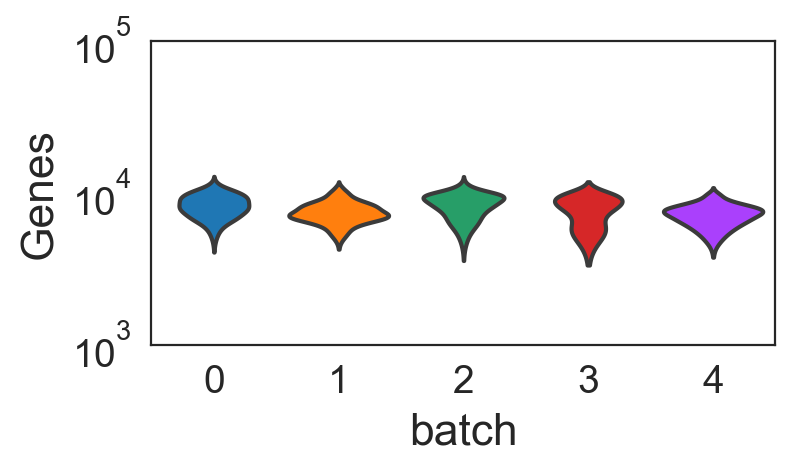

In [32]:
rcParams['figure.figsize'] = 4, 2
ax = sns.violinplot(x=data["batch"], y=data['>0 gene number'],saturation=1, inner=None)
ax.set_yscale("log")
ax.set_ylim(1000, 100000) 
#plt.xticks(rotation=90)
plt.ylabel("Genes", size=16)
plt.xlabel("batch", size=16)
#plt.savefig('Counts_by_samples.png',dpi = 300)

Text(0.5, 0, 'Seq_Strategy')

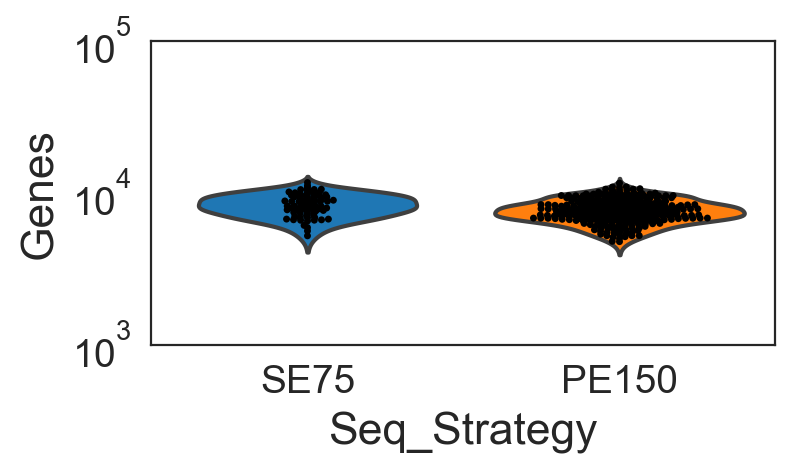

In [31]:
rcParams['figure.figsize'] = 4, 2
ax = sns.violinplot(x=data["seq_strategy"], y=data['>0 gene number'],saturation=1, inner=None)
ax = sns.swarmplot(x=data["seq_strategy"], y=data['>0 gene number'],size=2.5, palette=['black','black'])
ax.set_yscale("log")
ax.set_ylim(1000, 100000) 
#plt.xticks(rotation=90)
plt.ylabel("Genes", size=16)
plt.xlabel("Seq_Strategy", size=16)
#plt.savefig('Counts_by_samples.png',dpi = 300)